# <center> **Multivariate Regression Models For Biomedical Data Study** </center>

In [1]:
## Loading Librarbies and Checking For Availability
try:
    import pandas as pd 
    print("Library is available.")
    from statsmodels.formula.api import ols
    print("Library is available.")
    from statsmodels.stats.anova import anova_lm
    print("Library is available.")
    import matplotlib.pyplot as plt
    print("Library is available.")
    import numpy as np
    print("Library is available.")
    from mpl_toolkits.mplot3d import Axes3D
    print("Library is available.")
    import math
    print("Library is available.")
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print("Library is available.")    
    import seaborn as sns
    print("Library is available.")    
    
except ImportError:
    print("Library is not available.")

## Changing Potential Options
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.


In [2]:
## Loading Dataset For Modeling
health = pd.read_excel('health_cleaned_python.xlsx')
health.head(10)

,Date,Weight,Waist,Neck,Morning Body Temp,Morning Systolic Pressure,Morning Diastolic Pressure,Morning Pulse,Night Body Temp,Night Systolic Pressure,Night Diastolic Pressure,Night Pulse,Sleep,BMI,CBF,Gym,Cardio,Calories,Carbs,Fat,Protein,Fiber,Sugar,Servings,Water,Fat Calories
0,2024-01-26,275.6,47.5,17.0,95.7,113,73,74,97.4,128,79,73,11.5,39.54,35.19,1,1,1465.00,189.50,50.50,73.00,19.00,67.50,17.00,0.50,454.50
1,2024-01-27,271.8,47.0,17.0,96.2,114,75,67,97.8,108,75,82,5.5,38.99,34.57,1,0,2521.00,499.95,85.00,71.50,34.50,325.45,72.50,0.75,765.00
2,2024-01-28,271.8,47.0,17.0,96.7,136,76,71,96.1,112,63,70,8.0,38.99,34.57,0,0,1385.19,172.41,39.08,74.29,41.21,66.44,16.35,0.50,351.68
3,2024-01-29,272.8,47.0,17.0,97.5,131,85,76,97.1,158,88,86,8.0,39.14,34.57,1,0,570.00,108.00,12.00,4.00,8.00,46.00,6.00,0.50,108.00
4,2024-01-30,269.6,46.5,17.0,97.7,123,79,84,98.6,120,71,81,10.0,38.68,33.95,1,1,1946.33,259.04,60.10,104.33,47.73,67.67,19.30,2.00,540.88
5,2024-01-31,268.6,47.0,17.0,96.1,132,75,62,96.5,156,83,73,9.0,38.54,34.57,1,0,1265.23,195.20,34.86,69.58,42.56,96.87,20.90,1.50,313.76
6,2024-02-01,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,10.0,38.56,33.95,1,1,2167.33,309.47,70.80,67.88,19.91,213.35,17.50,1.00,637.21
7,2024-02-02,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,0.0,38.56,33.95,0,0,4080.00,349.00,229.00,163.00,15.00,91.00,12.00,0.00,2061.00
8,2024-02-03,269.4,47.0,17.0,97.7,120,77,76,96.5,124,75,66,16.5,38.65,34.57,1,0,2535.93,235.18,120.44,99.95,25.37,30.09,35.00,2.00,1083.97
9,2024-02-04,272.6,47.0,17.0,96.7,119,75,71,96.4,116,74,68,10.0,39.11,34.57,1,0,1635.93,139.18,82.44,78.45,21.87,20.59,21.50,2.00,741.97


In [3]:
## Creating Subset To Analyze
subset = health[health.columns[1:26]]
subset.head(10)

,Weight,Waist,Neck,Morning Body Temp,Morning Systolic Pressure,Morning Diastolic Pressure,Morning Pulse,Night Body Temp,Night Systolic Pressure,Night Diastolic Pressure,Night Pulse,Sleep,BMI,CBF,Gym,Cardio,Calories,Carbs,Fat,Protein,Fiber,Sugar,Servings,Water,Fat Calories
0,275.6,47.5,17.0,95.7,113,73,74,97.4,128,79,73,11.5,39.54,35.19,1,1,1465.00,189.50,50.50,73.00,19.00,67.50,17.00,0.50,454.50
1,271.8,47.0,17.0,96.2,114,75,67,97.8,108,75,82,5.5,38.99,34.57,1,0,2521.00,499.95,85.00,71.50,34.50,325.45,72.50,0.75,765.00
2,271.8,47.0,17.0,96.7,136,76,71,96.1,112,63,70,8.0,38.99,34.57,0,0,1385.19,172.41,39.08,74.29,41.21,66.44,16.35,0.50,351.68
3,272.8,47.0,17.0,97.5,131,85,76,97.1,158,88,86,8.0,39.14,34.57,1,0,570.00,108.00,12.00,4.00,8.00,46.00,6.00,0.50,108.00
4,269.6,46.5,17.0,97.7,123,79,84,98.6,120,71,81,10.0,38.68,33.95,1,1,1946.33,259.04,60.10,104.33,47.73,67.67,19.30,2.00,540.88
5,268.6,47.0,17.0,96.1,132,75,62,96.5,156,83,73,9.0,38.54,34.57,1,0,1265.23,195.20,34.86,69.58,42.56,96.87,20.90,1.50,313.76
6,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,10.0,38.56,33.95,1,1,2167.33,309.47,70.80,67.88,19.91,213.35,17.50,1.00,637.21
7,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,0.0,38.56,33.95,0,0,4080.00,349.00,229.00,163.00,15.00,91.00,12.00,0.00,2061.00
8,269.4,47.0,17.0,97.7,120,77,76,96.5,124,75,66,16.5,38.65,34.57,1,0,2535.93,235.18,120.44,99.95,25.37,30.09,35.00,2.00,1083.97
9,272.6,47.0,17.0,96.7,119,75,71,96.4,116,74,68,10.0,39.11,34.57,1,0,1635.93,139.18,82.44,78.45,21.87,20.59,21.50,2.00,741.97



Regression Model 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     407.7
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           3.27e-75
Time:                        04:44:44   Log-Likelihood:                -549.47
No. Observations:                 226   AIC:                             1105.
Df Residuals:                     223   BIC:                             1115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.0525     13.304

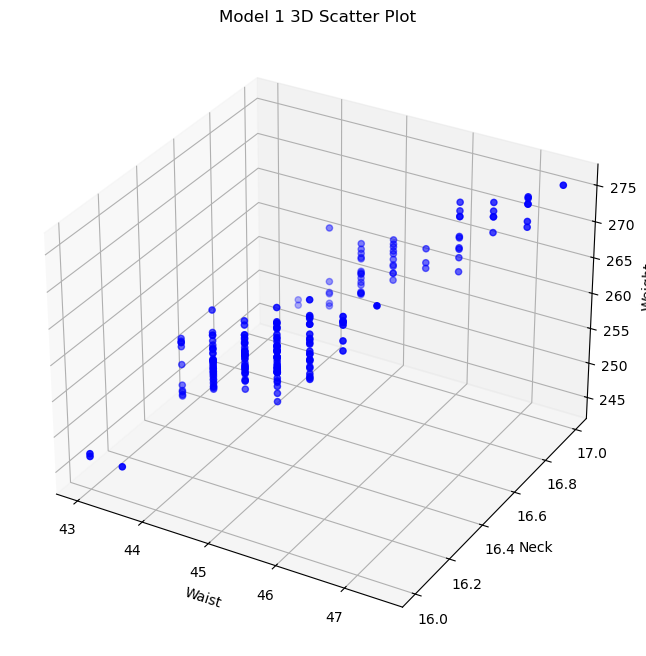

In [4]:
# Model Based On Best Results Of Linear Checks
x1 = subset['Waist']
x2 = subset['Neck']
y = subset['Weight']
model1 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 1')
print(model1.summary())
anova_results1 = anova_lm(model1)
print('\nANOVA Table 1')
print(anova_results1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Waist')
ax.set_ylabel('Neck')
ax.set_zlabel('Weight')
ax.set_title('Model 1 3D Scatter Plot')
plt.show()


Regression Model 2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.578
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0782
Time:                        04:44:44   Log-Likelihood:                -720.71
No. Observations:                 226   AIC:                             1447.
Df Residuals:                     223   BIC:                             1458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.1853      0.753

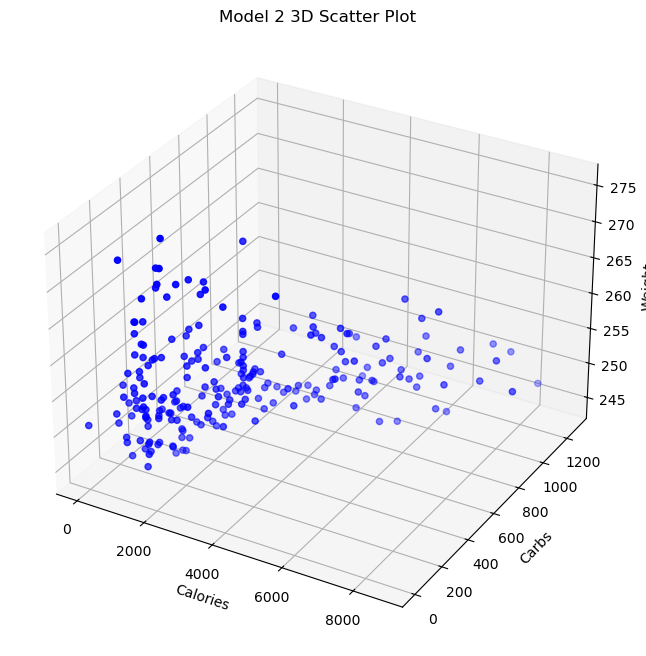


Regression Model 3
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.235
Date:                Sun, 30 Mar 2025   Prob (F-statistic):              0.109
Time:                        04:44:44   Log-Likelihood:                -721.05
No. Observations:                 226   AIC:                             1448.
Df Residuals:                     223   BIC:                             1458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.8732      0.946

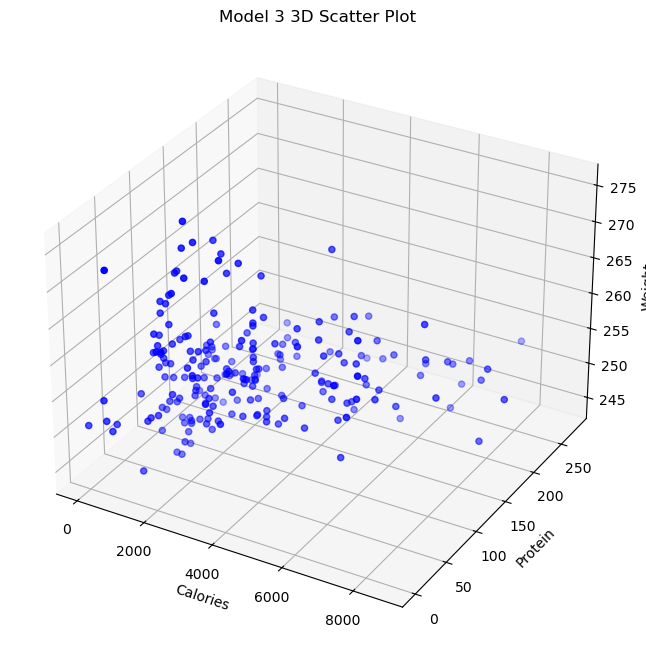


Regression Model 4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     8.696
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           0.000231
Time:                        04:44:45   Log-Likelihood:                -714.80
No. Observations:                 226   AIC:                             1436.
Df Residuals:                     223   BIC:                             1446.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.0014      0.732

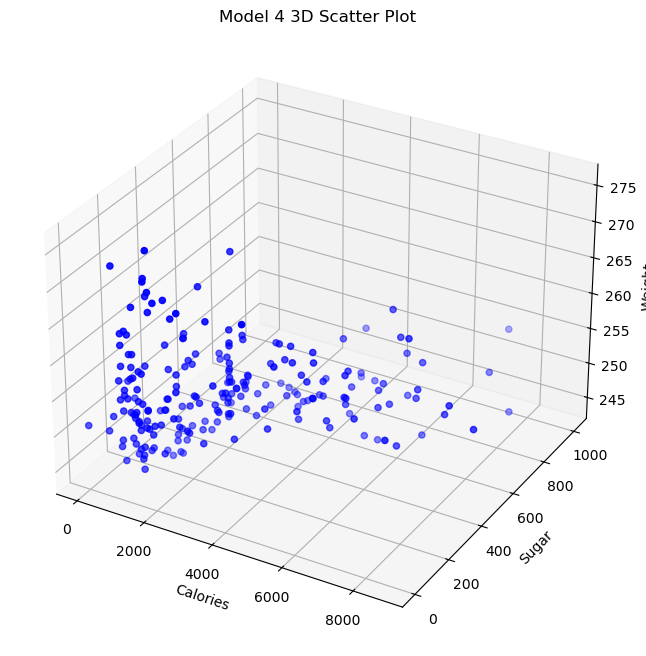


Regression Model 5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.645
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0732
Time:                        04:44:45   Log-Likelihood:                -720.64
No. Observations:                 226   AIC:                             1447.
Df Residuals:                     223   BIC:                             1458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    255.7805      0.845

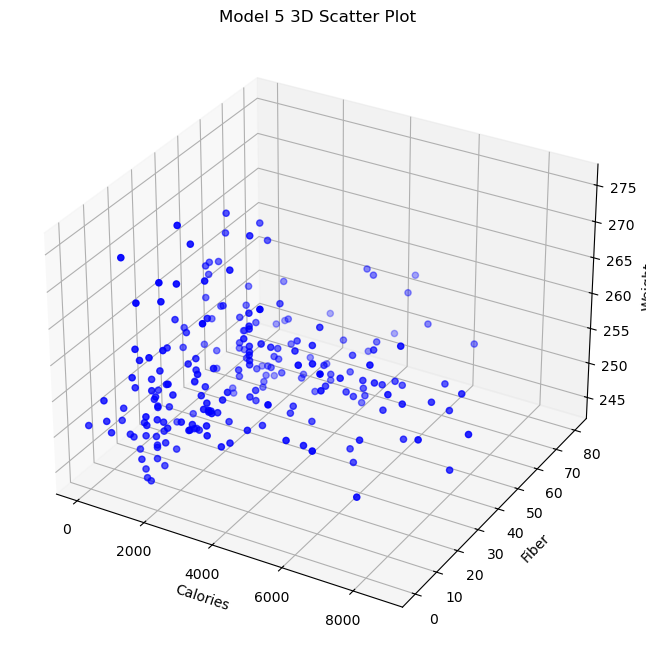


Regression Model 6
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.084
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0477
Time:                        04:44:45   Log-Likelihood:                -720.20
No. Observations:                 226   AIC:                             1446.
Df Residuals:                     223   BIC:                             1457.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.2857      0.745

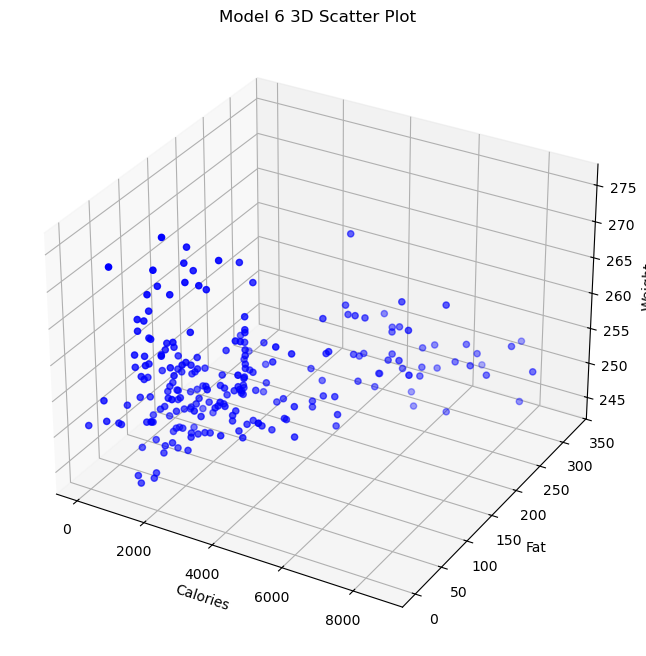


Regression Model 7
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.902
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0570
Time:                        04:44:45   Log-Likelihood:                -720.38
No. Observations:                 226   AIC:                             1447.
Df Residuals:                     223   BIC:                             1457.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.1417      0.729

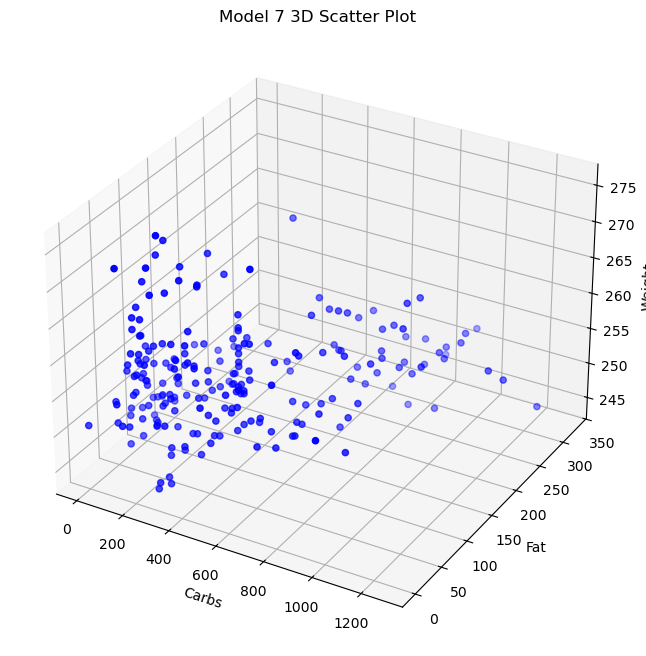


Regression Model 8
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     14.09
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.72e-06
Time:                        04:44:45   Log-Likelihood:                -709.84
No. Observations:                 226   AIC:                             1426.
Df Residuals:                     223   BIC:                             1436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    255.5628      0.684

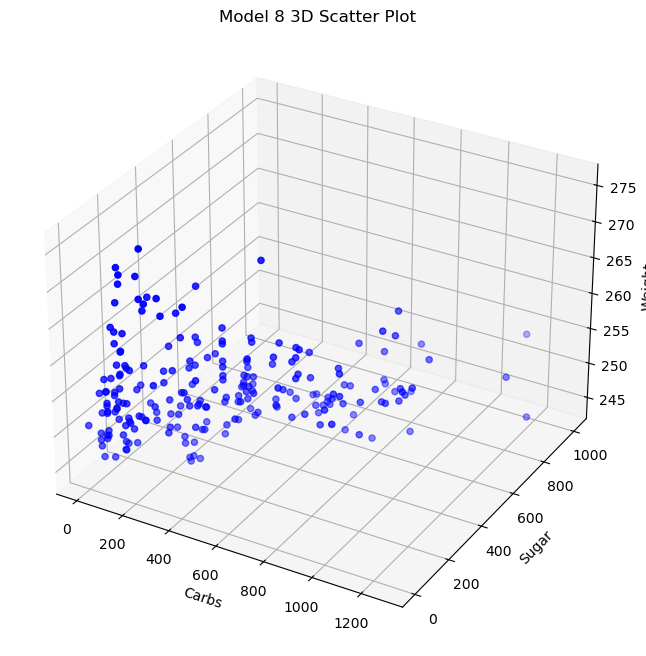


Regression Model  9
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.812
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0622
Time:                        04:44:45   Log-Likelihood:                -720.47
No. Observations:                 226   AIC:                             1447.
Df Residuals:                     223   BIC:                             1457.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.9605      0.94

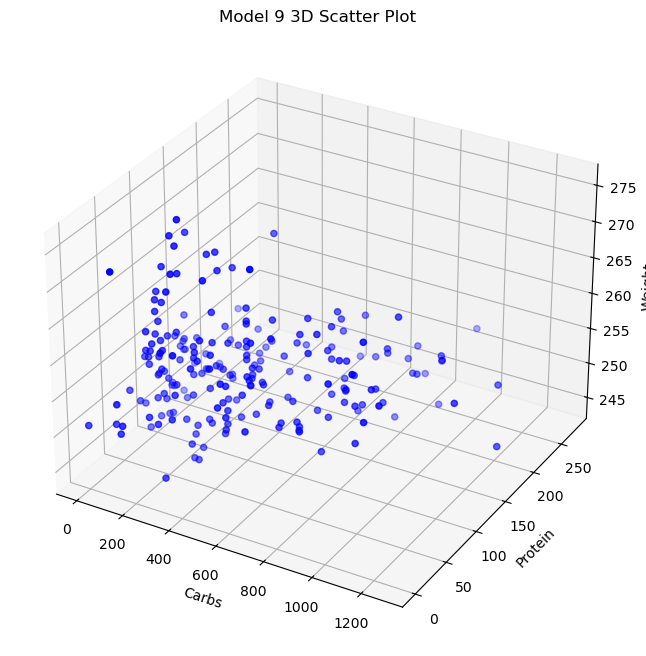


Regression Model 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.560
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0301
Time:                        04:44:45   Log-Likelihood:                -719.74
No. Observations:                 226   AIC:                             1445.
Df Residuals:                     223   BIC:                             1456.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    255.7372      0.80

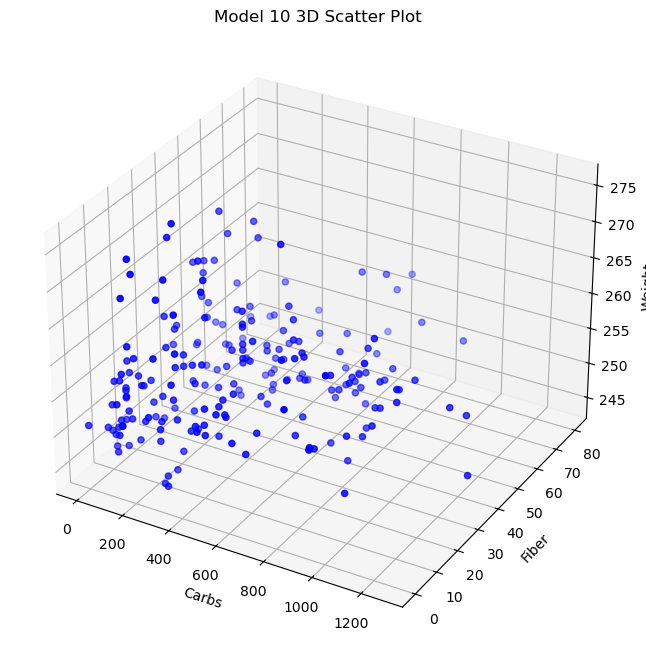


Regression Model 11
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.557
Date:                Sun, 30 Mar 2025   Prob (F-statistic):            0.00171
Time:                        04:44:46   Log-Likelihood:                -716.83
No. Observations:                 226   AIC:                             1440.
Df Residuals:                     223   BIC:                             1450.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.1396      0.93

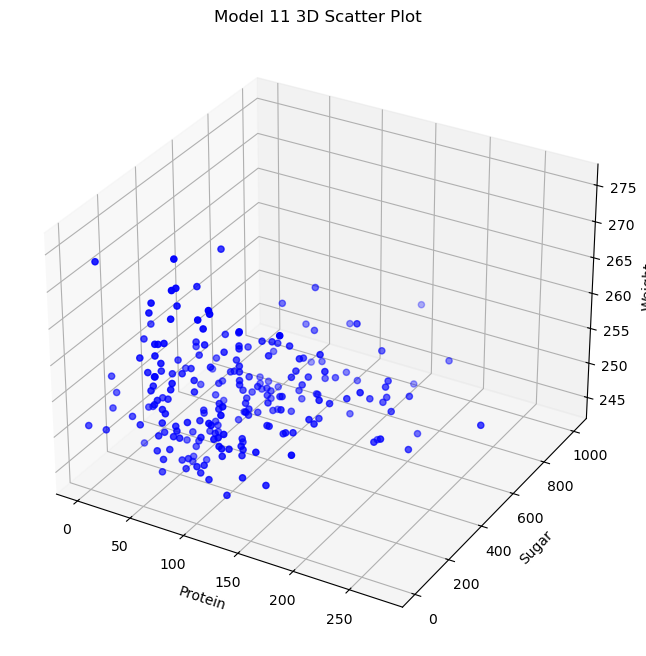


Regression Model 12
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.177
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0436
Time:                        04:44:46   Log-Likelihood:                -720.11
No. Observations:                 226   AIC:                             1446.
Df Residuals:                     223   BIC:                             1456.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.4682      0.98

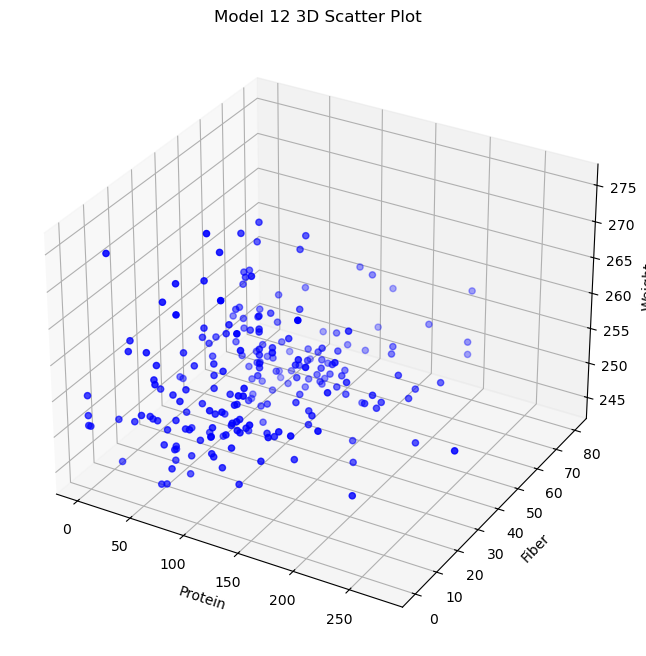


Regression Model 13
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.511
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0835
Time:                        04:44:46   Log-Likelihood:                -720.77
No. Observations:                 226   AIC:                             1448.
Df Residuals:                     223   BIC:                             1458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.0078      0.95

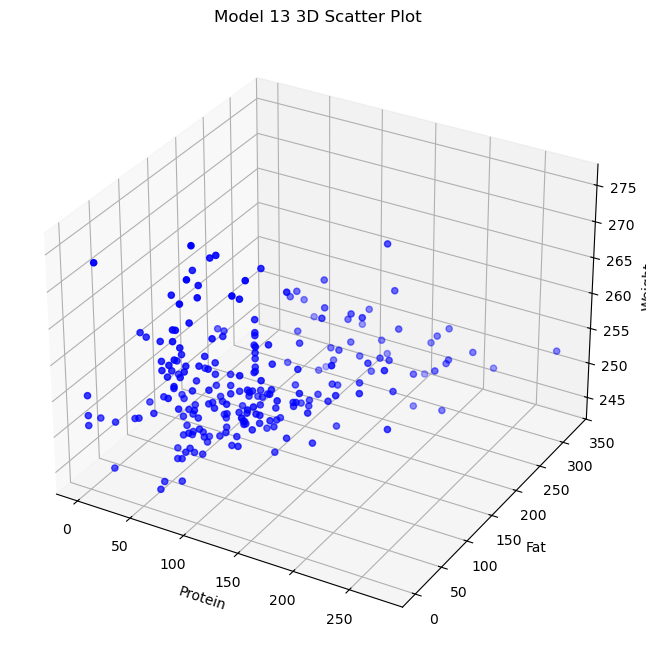


Regression Model 14
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9683
Date:                Sun, 30 Mar 2025   Prob (F-statistic):              0.381
Time:                        04:44:46   Log-Likelihood:                -722.31
No. Observations:                 226   AIC:                             1451.
Df Residuals:                     223   BIC:                             1461.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    255.3550      0.83

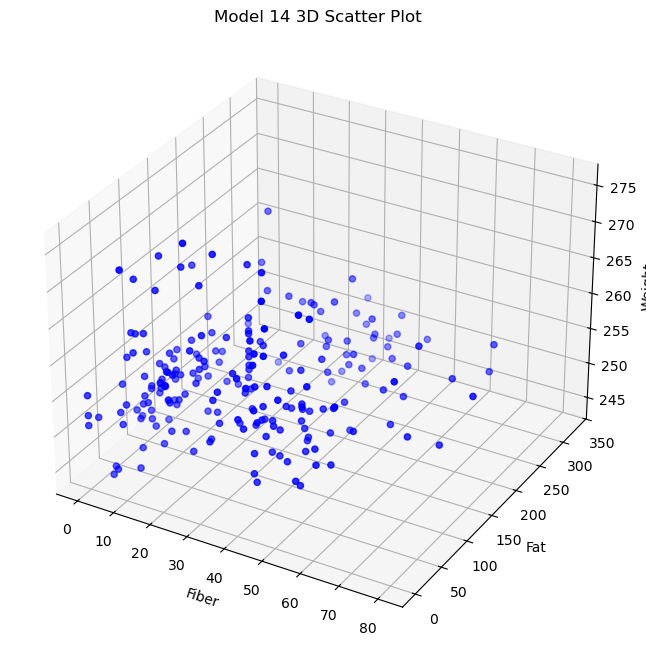


Regression Model 15
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     7.926
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           0.000473
Time:                        04:44:46   Log-Likelihood:                -715.53
No. Observations:                 226   AIC:                             1437.
Df Residuals:                     223   BIC:                             1447.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.0349      0.77

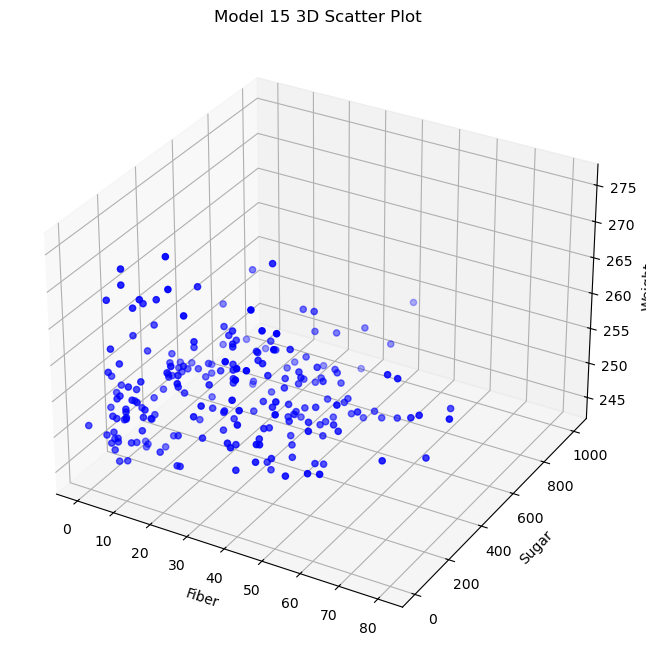


Regression Model 16
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.513
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           0.000695
Time:                        04:44:46   Log-Likelihood:                -715.92
No. Observations:                 226   AIC:                             1438.
Df Residuals:                     223   BIC:                             1448.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.3296      0.71

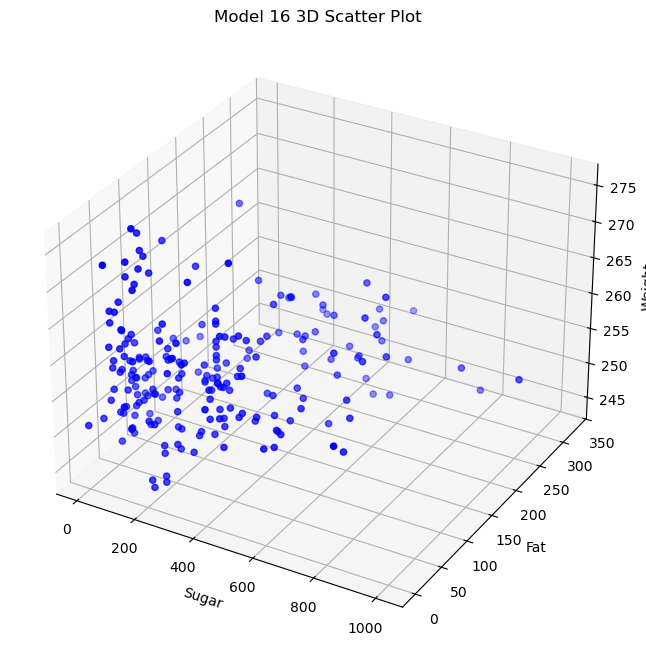

In [5]:
## Testing For The Best Diet Variable Combination
### Model 2
x1 = subset['Calories']
x2 = subset['Carbs']
y = subset['Weight']
model2 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 2')
print(model2.summary())
anova_results2 = anova_lm(model2)
print('\nANOVA Table 2')
print(anova_results2)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Calories')
ax.set_ylabel('Carbs')
ax.set_zlabel('Weight')
ax.set_title('Model 2 3D Scatter Plot')
plt.show()

### Model 3
x1 = subset['Calories']
x2 = subset['Protein']
model3 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 3')
print(model3.summary())
anova_results3 = anova_lm(model3)
print('\nANOVA Table 3')
print(anova_results3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Calories')
ax.set_ylabel('Protein')
ax.set_zlabel('Weight')
ax.set_title('Model 3 3D Scatter Plot')
plt.show()

### Model 4
x1 = subset['Calories']
x2 = subset['Sugar']
model4 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 4')
print(model4.summary())
anova_results4 = anova_lm(model4)
print('\nANOVA Table 4')
print(anova_results4)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Calories')
ax.set_ylabel('Sugar')
ax.set_zlabel('Weight')
ax.set_title('Model 4 3D Scatter Plot')
plt.show()

### Model 5
x1 = subset['Calories']
x2 = subset['Fiber']
model5 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 5')
print(model5.summary())
anova_results5 = anova_lm(model5)
print('\nANOVA Table 5')
print(anova_results5)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Calories')
ax.set_ylabel('Fiber')
ax.set_zlabel('Weight')
ax.set_title('Model 5 3D Scatter Plot')
plt.show()

### Model 6
x1 = subset['Calories']
x2 = subset['Fat ']
model6 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 6')
print(model6.summary())
anova_results6 = anova_lm(model6)
print('\nANOVA Table 6')
print(anova_results6)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Calories')
ax.set_ylabel('Fat')
ax.set_zlabel('Weight')
ax.set_title('Model 6 3D Scatter Plot')
plt.show()

### Model 7
x1 = subset['Carbs']
x2 = subset['Fat ']
model7 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 7')
print(model7.summary())
anova_results7 = anova_lm(model7)
print('\nANOVA Table 7')
print(anova_results7)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Carbs')
ax.set_ylabel('Fat')
ax.set_zlabel('Weight')
ax.set_title('Model 7 3D Scatter Plot')
plt.show()

### Model 8
x1 = subset['Carbs']
x2 = subset['Sugar']
model8 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 8')
print(model8.summary())
anova_results8 = anova_lm(model8)
print('\nANOVA Table 8')
print(anova_results8)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Carbs')
ax.set_ylabel('Sugar')
ax.set_zlabel('Weight')
ax.set_title('Model 8 3D Scatter Plot')
plt.show()

### Model 9
x1 = subset['Carbs']
x2 = subset['Protein']
model9 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model  9')
print(model9.summary())
anova_results9 = anova_lm(model9)
print('\nANOVA Table 9')
print(anova_results9)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Carbs')
ax.set_ylabel('Protein')
ax.set_zlabel('Weight')
ax.set_title('Model 9 3D Scatter Plot')
plt.show()

### Model 10
x1 = subset['Carbs']
x2 = subset['Fiber']
model10 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 10')
print(model10.summary())
anova_results10 = anova_lm(model10)
print('\nANOVA Table 10')
print(anova_results10)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Carbs')
ax.set_ylabel('Fiber')
ax.set_zlabel('Weight')
ax.set_title('Model 10 3D Scatter Plot')
plt.show()

### Model 11
x1 = subset['Protein']
x2 = subset['Sugar']
model11 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 11')
print(model11.summary())
anova_results11 = anova_lm(model11)
print('\nANOVA Table 11')
print(anova_results11)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Protein')
ax.set_ylabel('Sugar')
ax.set_zlabel('Weight')
ax.set_title('Model 11 3D Scatter Plot')
plt.show()

### Model 12
x1 = subset['Protein']
x2 = subset['Fiber']
model12 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 12')
print(model12.summary())
anova_results12 = anova_lm(model12)
print('\nANOVA Table 12')
print(anova_results12)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Protein')
ax.set_ylabel('Fiber')
ax.set_zlabel('Weight')
ax.set_title('Model 12 3D Scatter Plot')
plt.show()

### Model 13
x1 = subset['Protein']
x2 = subset['Fat ']
model13 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 13')
print(model13.summary())
anova_results13 = anova_lm(model13)
print('\nANOVA Table 13')
print(anova_results13)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Protein')
ax.set_ylabel('Fat')
ax.set_zlabel('Weight')
ax.set_title('Model 13 3D Scatter Plot')
plt.show()

### Model 14
x1 = subset['Fiber']
x2 = subset['Fat ']
model14 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 14')
print(model14.summary())
anova_results14 = anova_lm(model14)
print('\nANOVA Table 14')
print(anova_results14)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Fiber')
ax.set_ylabel('Fat')
ax.set_zlabel('Weight')
ax.set_title('Model 14 3D Scatter Plot')
plt.show()

### Model 15
x1 = subset['Fiber']
x2 = subset['Sugar']
model15 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 15')
print(model15.summary())
anova_results15 = anova_lm(model15)
print('\nANOVA Table 15')
print(anova_results15)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Fiber')
ax.set_ylabel('Sugar')
ax.set_zlabel('Weight')
ax.set_title('Model 15 3D Scatter Plot')
plt.show()

### Model 16
x1 = subset['Sugar']
x2 = subset['Fat ']
model16 = ols("y ~ x1 + x2", subset).fit()
print('\nRegression Model 16')
print(model16.summary())
anova_results16 = anova_lm(model16)
print('\nANOVA Table 16')
print(anova_results16)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
ax.set_xlabel('Sugar')
ax.set_ylabel('Fat')
ax.set_zlabel('Weight')
ax.set_title('Model 16 3D Scatter Plot')
plt.show()

In [6]:
## Looking For Next Best Model Combination
x1 = subset['Carbs']
x2 = subset['Sugar']
x3 = subset['Calories']
y = subset['Weight']
model17 = ols("y ~ x1 + x2 + x3", subset).fit()
print('\nRegression Model 17')
print(model17.summary())
anova_results17 = anova_lm(model17)
print('\nANOVA Table 17')
print(anova_results17)

x3 = subset['Fat ']
model18 = ols("y ~ x1 + x2 + x3", subset).fit()
print('\nRegression Model 18')
print(model18.summary())
anova_results18 = anova_lm(model18)
print('\nANOVA Table 18')
print(anova_results18)

x3 = subset['Fiber']
model19 = ols("y ~ x1 + x2 + x3", subset).fit()
print('\nRegression Model 19')
print(model19.summary())
anova_results19 = anova_lm(model19)
print('\nANOVA Table 19')
print(anova_results19)

x3 = subset['Protein']
model20 = ols("y ~ x1 + x2 + x3", subset).fit()
print('\nRegression Model 20')
print(model20.summary())
anova_results20 = anova_lm(model20)
print('\nANOVA Table 20')
print(anova_results20)


Regression Model 17
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     12.44
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.50e-07
Time:                        04:44:46   Log-Likelihood:                -705.73
No. Observations:                 226   AIC:                             1419.
Df Residuals:                     222   BIC:                             1433.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.1726      0.70

In [7]:
## Looking For Next Best Model Combination
x1 = subset['Carbs']
x2 = subset['Sugar']
x3 = subset['Protein']
x4 = subset['Fat ']
y = subset['Weight']
model21 = ols("y ~ x1 + x2 + x3 + x4", subset).fit()
print('\nRegression Model 21')
print(model21.summary())
anova_results21 = anova_lm(model21)
print('\nANOVA Table 21')
print(anova_results21)

x4 = subset['Fiber']
model22 = ols("y ~ x1 + x2 + x3 + x4", subset).fit()
print('\nRegression Model 22')
print(model22.summary())
anova_results22 = anova_lm(model22)
print('\nANOVA Table 22')
print(anova_results22)

x4 = subset['Calories']
model23 = ols("y ~ x1 + x2 + x3 + x4", subset).fit()
print('\nRegression Model 23')
print(model23.summary())
anova_results23 = anova_lm(model23)
print('\nANOVA Table 23')
print(anova_results23)


Regression Model 21
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     10.16
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.45e-07
Time:                        04:44:47   Log-Likelihood:                -704.22
No. Observations:                 226   AIC:                             1418.
Df Residuals:                     221   BIC:                             1436.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.1463      0.91

In [8]:
## Looking For Next Best Model Combination
x1 = subset['Carbs']
x2 = subset['Sugar']
x3 = subset['Protein']
x4 = subset['Fat ']
x5 = subset['Calories']
y = subset['Weight']
model24 = ols("y ~ x1 + x2 + x3 + x4 + x5", subset).fit()
print('\nRegression Model 24')
print(model24.summary())
anova_results24 = anova_lm(model24)
print('\nANOVA Table 24')
print(anova_results24)

x5 = subset['Fiber']
model25 = ols("y ~ x1 + x2 + x3 + x4 + x5", subset).fit()
print('\nRegression Model 25')
print(model25.summary())
anova_results25 = anova_lm(model25)
print('\nANOVA Table 25')
print(anova_results25)


Regression Model 24
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     8.098
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           4.95e-07
Time:                        04:44:47   Log-Likelihood:                -704.20
No. Observations:                 226   AIC:                             1420.
Df Residuals:                     220   BIC:                             1441.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.1177      0.92

In [9]:
## Model With All Variables
x1 = subset['Carbs']
x2 = subset['Sugar']
x3 = subset['Protein']
x4 = subset['Fat ']
x5 = subset['Calories']
x6 = subset['Fiber']
y = subset['Weight']
model26 = ols("y ~ x1 + x2 + x3 + x4 + x5 + x6", subset).fit()
print('\nRegression Model 26')
print(model26.summary())
anova_results26 = anova_lm(model26)
print('\nANOVA Table 26')
print(anova_results26)


Regression Model 26
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     6.718
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.52e-06
Time:                        04:44:47   Log-Likelihood:                -704.20
No. Observations:                 226   AIC:                             1422.
Df Residuals:                     219   BIC:                             1446.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.1096      0.94

In [10]:
## Storing R^2 Values and Determining Best Model
rsquared = {'model1': model1.rsquared, 'model2': model2.rsquared, 'model3': model3.rsquared, 'model4': model4.rsquared, 'model5': model5.rsquared, 'model6': model6.rsquared, 'model7': model7.rsquared, 
            'model8': model8.rsquared, 'model9': model9.rsquared, 'model10': model10.rsquared, 'model11': model11.rsquared, 'model12': model12.rsquared, 'model13': model13.rsquared, 'model14': model14.rsquared, 
            'model15': model15.rsquared, 'model16': model16.rsquared, 'model17': model17.rsquared, 'model18': model18.rsquared, 'model19': model19.rsquared, 'model20': model20.rsquared, 
            'model21': model21.rsquared, 'model22': model22.rsquared, 'model23': model23.rsquared, 'model24': model24.rsquared, 'model25': model25.rsquared, 'model26': model26.rsquared}
print(rsquared)
max_key = max(rsquared, key=rsquared.get)
print('\nBest Model: ', max_key)

{'model1': 0.7852315059053103, 'model2': 0.02259749653010934, 'model3': 0.019648720260383, 'model4': 0.07235082475667609, 'model5': 0.02317502022627438, 'model6': 0.026915506736982397, 'model7': 0.025365482551176433, 'model8': 0.1122185458211169, 'model9': 0.024603568390161756, 'model10': 0.030939657836487666, 'model11': 0.05554478195618562, 'model12': 0.027701710238572375, 'model13': 0.022020877512960002, 'model14': 0.008609686282741502, 'model15': 0.06636641007377975, 'model16': 0.06313115404053427, 'model17': 0.1438987836301655, 'model18': 0.13927510833934897, 'model19': 0.11228031400655158, 'model20': 0.15003462619941765, 'model21': 0.155263649492431, 'model22': 0.1508908569003793, 'model23': 0.15400131418398033, 'model24': 0.15543118314487625, 'model25': 0.15529731130659363, 'model26': 0.155436849116661}

Best Model:  model1


In [11]:
## Storing Adjusted R^2 Values and Determining Best Model
rsquaredadj = {'model1': model1.rsquared_adj, 'model2': model2.rsquared_adj, 'model3': model3.rsquared_adj, 'model4': model4.rsquared_adj, 'model5': model5.rsquared_adj, 'model6': model6.rsquared_adj, 
               'model7': model7.rsquared_adj, 'model8': model8.rsquared_adj, 'model9': model9.rsquared_adj, 'model10': model10.rsquared_adj, 'model11': model11.rsquared_adj, 'model12': model12.rsquared_adj, 
               'model13': model13.rsquared_adj, 'model14': model14.rsquared_adj, 'model15': model15.rsquared_adj, 'model16': model16.rsquared_adj, 'model17': model17.rsquared_adj, 
               'model18': model18.rsquared_adj, 'model19': model19.rsquared_adj, 'model20': model20.rsquared_adj, 'model21': model21.rsquared_adj, 'model22': model22.rsquared_adj, 
         'model23': model23.rsquared_adj, 'model24': model24.rsquared_adj, 'model25': model25.rsquared_adj, 'model26': model26.rsquared_adj}
print(rsquaredadj)
max_key = max(rsquaredadj, key=rsquaredadj.get)
print('\nBest Model: ', max_key)

{'model1': 0.7833053310703804, 'model2': 0.013831554794953349, 'model3': 0.010856332101283228, 'model4': 0.06403110121189293, 'model5': 0.014414258075837405, 'model6': 0.018188291550766955, 'model7': 0.016624365802756502, 'model8': 0.10425638031278606, 'model9': 0.015855618330880672, 'model10': 0.022248533691523353, 'model11': 0.0470743315701424, 'model12': 0.018981546204837607, 'model13': 0.01324976430679814, 'model14': -0.0002817066653952871, 'model15': 0.05799301464843243, 'model16': 0.05472874286600993, 'model17': 0.13232984827381633, 'model18': 0.12764369088447525, 'model19': 0.10028410203366711, 'model20': 0.1385486076345448, 'model21': 0.1399743037818868, 'model22': 0.13552236562255815, 'model23': 0.13868912077554563, 'model24': 0.13623643730725987, 'model25': 0.13609952292719807, 'model26': 0.13229813265410373}

Best Model:  model1


In [12]:
## Storing F Statistic Values and Associated P-Values
fstat = {'model1': model1.fvalue, 'model2': model2.fvalue, 'model3': model3.fvalue, 'model4': model4.fvalue, 'model5': model5.fvalue, 'model6': model6.fvalue, 'model7': model7.fvalue, 'model8': model8.fvalue, 
         'model9': model9.fvalue, 'model10': model10.fvalue, 'model11': model11.fvalue, 'model12': model12.fvalue, 'model13': model13.fvalue, 'model14': model14.fvalue, 'model15': model15.fvalue, 
         'model16': model16.fvalue, 'model17': model17.fvalue, 'model18': model18.fvalue, 'model19': model19.fvalue, 'model20': model20.fvalue, 'model21': model21.fvalue, 'model22': model22.fvalue, 
         'model23': model23.fvalue, 'model24': model24.fvalue, 'model25': model25.fvalue, 'model26': model26.fvalue}
print(fstat)

fpvalue = {'model1': model1.f_pvalue, 'model2': model2.f_pvalue, 'model3': model3.f_pvalue, 'model4': model4.f_pvalue, 'model5': model5.f_pvalue, 'model6': model6.f_pvalue, 'model7': model7.f_pvalue, 
           'model8': model8.f_pvalue, 'model9': model9.f_pvalue, 'model10': model10.f_pvalue, 'model11': model11.f_pvalue, 'model12': model12.f_pvalue, 'model13': model13.f_pvalue, 'model14': model14.f_pvalue, 
           'model15': model15.f_pvalue, 'model16': model16.f_pvalue, 'model17': model17.f_pvalue, 'model18': model18.f_pvalue, 'model19': model19.f_pvalue, 'model20': model20.f_pvalue, 
           'model21': model21.f_pvalue, 'model22': model22.f_pvalue, 'model23': model23.f_pvalue, 'model24': model24.f_pvalue, 'model25': model25.f_pvalue, 'model26': model26.f_pvalue}
print('\n', fpvalue)

{'model1': 407.6636718877425, 'model2': 2.577874370243841, 'model3': 2.2347421320392393, 'model4': 8.696301549832526, 'model5': 2.6453201021007424, 'model6': 3.084088814435944, 'model7': 2.901858341585653, 'model8': 14.093973015720787, 'model9': 2.8124952958617837, 'model10': 3.559914381664258, 'model11': 6.557476807574148, 'model12': 3.176741874511273, 'model13': 2.510613760804065, 'model14': 0.9683169254762918, 'model15': 7.925865996114402, 'model16': 7.51345687913303, 'model17': 12.438377361248955, 'model18': 11.974044339797253, 'model19': 9.35964738371944, 'model20': 13.062370163518892, 'model21': 10.155022486368008, 'model22': 9.818195824995211, 'model23': 10.05743005434796, 'model24': 8.097590062394763, 'model25': 8.089333429327176, 'model26': 6.717608963668614}

 {'model1': 3.2712879633711333e-75, 'model2': 0.07819686620030206, 'model3': 0.10941120240445727, 'model4': 0.00023082856462709078, 'model5': 0.0732096633336614, 'model6': 0.047729461088452434, 'model7': 0.05699796944002

In [13]:
## Storing Model MSE Values
MSE = {'model1': model1.mse_resid, 'model2': model2.mse_resid, 'model3': model3.mse_resid, 'model4': model4.mse_resid, 'model5': model5.mse_resid, 'model6': model6.mse_resid, 'model7': model7.mse_resid, 
     'model8': model8.mse_resid, 'model9': model9.mse_resid, 'model10': model10.mse_resid, 'model11': model11.mse_resid, 'model12': model12.mse_resid, 'model13': model13.mse_resid, 'model14': model14.mse_resid, 
     'model15': model15.mse_resid, 'model16': model16.mse_resid, 'model17': model17.mse_resid, 'model18': model18.mse_resid, 'model19': model19.mse_resid, 'model20': model20.mse_resid, 'model21': model21.mse_resid, 
       'model22': model22.mse_resid, 'model23': model23.mse_resid, 'model24': model24.mse_resid, 'model25': model25.mse_resid, 'model26': model26.mse_resid}
print(MSE)

{'model1': 7.6757767165966655, 'model2': 34.932141283114674, 'model3': 35.037529870621555, 'model4': 33.15396874442612, 'model5': 34.91150071868277, 'model6': 34.77781658876109, 'model7': 34.83321409762627, 'model8': 31.72910553820889, 'model9': 34.8604447349775, 'model10': 34.63399435150114, 'model11': 33.75461285924334, 'model12': 34.74971785594905, 'model13': 34.952749514526076, 'model14': 35.43206241291308, 'model15': 33.367850352522616, 'model16': 33.48347766106661, 'model17': 30.73468480421573, 'model18': 30.900678263847603, 'model19': 31.86981191219268, 'model20': 30.51440338915839, 'model21': 30.463902260788398, 'model22': 30.621599187232867, 'model23': 30.509426120906262, 'model24': 30.59630528019543, 'model25': 30.60115507283609, 'model26': 30.73580823755419}


In [14]:
## Storing Model T Values
T = {'model1': model1.tvalues, 'model2': model2.tvalues, 'model3': model3.tvalues, 'model4': model4.tvalues, 'model5': model5.tvalues, 'model6': model6.tvalues, 'model7': model7.tvalues, 
     'model8': model8.tvalues, 'model9': model9.tvalues, 'model10': model10.tvalues, 'model11': model11.tvalues, 'model12': model12.tvalues, 'model13': model13.tvalues, 'model14': model14.tvalues, 
     'model15': model15.tvalues, 'model16': model16.tvalues, 'model17': model17.tvalues, 'model18': model18.tvalues, 'model19': model19.tvalues, 'model20': model20.tvalues, 'model21': model21.tvalues, 
     'model22': model22.tvalues, 'model23': model23.tvalues, 'model24': model24.tvalues, 'model25': model25.tvalues, 'model26': model26.tvalues}
print(T)

{'model1': Intercept    -1.958236
x1           22.197948
x2            2.781503
dtype: float64, 'model2': Intercept    340.367409
x1             0.632318
x2            -1.278728
dtype: float64, 'model3': Intercept    271.632295
x1            -0.474315
x2            -0.979525
dtype: float64, 'model4': Intercept    349.677819
x1             2.057242
x2            -3.699078
dtype: float64, 'model5': Intercept    302.796402
x1            -2.253419
x2             1.329644
dtype: float64, 'model6': Intercept    343.931272
x1            -2.236068
x2             1.622329
dtype: float64, 'model7': Intercept    351.275596
x1            -2.153461
x2             1.016999
dtype: float64, 'model8': Intercept    373.636105
x1             3.799552
x2            -4.790816
dtype: float64, 'model9': Intercept    271.887799
x1            -1.165727
x2            -0.926977
dtype: float64, 'model10': Intercept    317.056285
x1            -2.627809
x2             1.524128
dtype: float64, 'model11': Intercept 

In [15]:
## Determining The Coefficient Of Variation For Each Model
COV = {}
for i in MSE.values():
    S2 = i
    S = math.sqrt(S2)
    CV = 100*(S/subset['Weight'].mean())
    variable_name = f"{i}"
    COV[variable_name] = {CV}
    print(f"S^2, S, & CV:", S2, S, CV)

S^2, S, & CV: 7.6757767165966655 2.7705192142623134 1.0859881754254246
S^2, S, & CV: 34.932141283114674 5.910341892235564 2.316735929730189
S^2, S, & CV: 35.037529870621555 5.919250786258473 2.320228038182349
S^2, S, & CV: 33.15396874442612 5.757948310329481 2.2570006905343116
S^2, S, & CV: 34.91150071868277 5.908595494589451 2.3160513767469406
S^2, S, & CV: 34.77781658876109 5.897271961573511 2.3116127780553866
S^2, S, & CV: 34.83321409762627 5.901966968530599 2.3134531269736285
S^2, S, & CV: 31.72910553820889 5.632859445983797 2.2079683550581692
S^2, S, & CV: 34.8604447349775 5.904273429896137 2.3143572137444965
S^2, S, & CV: 34.63399435150114 5.885065365100131 2.3068280361326305
S^2, S, & CV: 33.75461285924334 5.809872017458159 2.2773537462632576
S^2, S, & CV: 34.74971785594905 5.894889130081163 2.3106787557207276
S^2, S, & CV: 34.952749514526076 5.912085039520835 2.3174192086369305
S^2, S, & CV: 35.43206241291308 5.952483717988071 2.3332546834072843
S^2, S, & CV: 33.367850352522616

                              Weight     Waist      Neck  Morning Body Temp  \
Weight                      1.000000  0.881919  0.557379           0.084205   
Waist                       0.881919  1.000000  0.550281           0.148226   
Neck                        0.557379  0.550281  1.000000           0.004400   
Morning Body Temp           0.084205  0.148226  0.004400           1.000000   
Morning Systolic Pressure  -0.069149 -0.105147 -0.059371           0.209429   
Morning Diastolic Pressure  0.102390  0.036851 -0.024430           0.148343   
Morning Pulse              -0.002502 -0.007438 -0.184017           0.387507   
Night Body Temp             0.117479  0.059948 -0.087814           0.089208   
Night Systolic Pressure    -0.198496 -0.181984 -0.003145          -0.036450   
Night Diastolic Pressure   -0.045351 -0.122893 -0.021068          -0.094217   
Night Pulse                 0.047661 -0.028692 -0.101184          -0.092540   
Sleep                       0.092586  0.091363  0.04

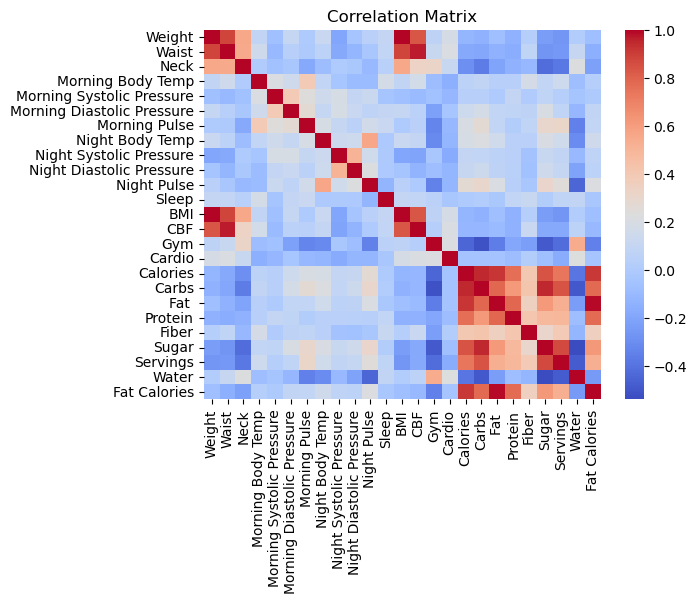

In [16]:
# Creating a Correlation Matrix to Check Multicollinearity
corr_matrix = subset.corr(method='pearson')
print(corr_matrix)

sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [17]:
models = model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14, model15, model16, model17, model18, model19, model20, model21, model22, model23, model24, model25, model26
for i in models:
    reg = i.model.exog
    vif = [variance_inflation_factor(reg, i) for i in range(reg.shape[1])]
    print(f"Model {models.index(i)+1}: {vif}")

Model 1: [5211.418142511712, 1.4343283389177504, 1.4343283389177488]
Model 2: [3.6651827408233872, 10.354691919529543, 10.354691919529543]
Model 3: [5.768323218855919, 2.364415133082201, 2.3644151330822]
Model 4: [3.653604696470721, 3.3823815821959893, 3.3823815821959866]
Model 5: [4.619269727310855, 1.193557510908402, 1.1935575109084018]
Model 6: [3.6083738184947816, 6.330969168677302, 6.330969168677302]
Model 7: [3.4496856396808093, 2.5923379743312243, 2.592337974331225]
Model 8: [3.3323313506561, 9.65554210399268, 9.65554210399267]
Model 9: [5.790670629850835, 1.5910313426323366, 1.5910313426323361]
Model 10: [4.245422365353883, 1.2142770828683722, 1.214277082868372]
Model 11: [5.813496601482113, 1.2955856271777615, 1.2955856271777615]
Model 12: [6.310157944575146, 1.2033688902241397, 1.2033688902241397]
Model 13: [5.889844112975791, 2.609809197467998, 2.609809197467998]
Model 14: [4.485107092810209, 1.139597333261465, 1.1395973332614655]
Model 15: [4.097039572456222, 1.104719144045

In [18]:
## Displaying CV Values
value_list = list(COV.values())
print(value_list)

## Locating Specific Model Placement By CV Value
# value_list.index({2.1731327110666854})

[{1.0859881754254246}, {2.316735929730189}, {2.320228038182349}, {2.2570006905343116}, {2.3160513767469406}, {2.3116127780553866}, {2.3134531269736285}, {2.2079683550581692}, {2.3143572137444965}, {2.3068280361326305}, {2.2773537462632576}, {2.3106787557207276}, {2.3174192086369305}, {2.3332546834072843}, {2.264269124944738}, {2.2681888399533756}, {2.173092995305401}, {2.178953369175925}, {2.2128586843974603}, {2.1652915031126563}, {2.1634989898612016}, {2.169091457134166}, {2.1651149032947306}, {2.1681954207807395}, {2.1683672533180234}, {2.1731327110666854}]


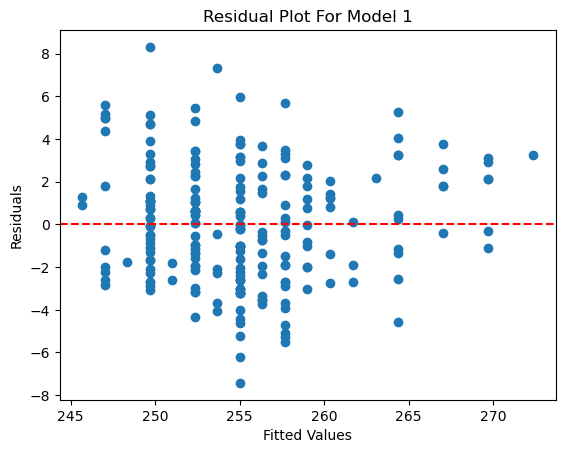

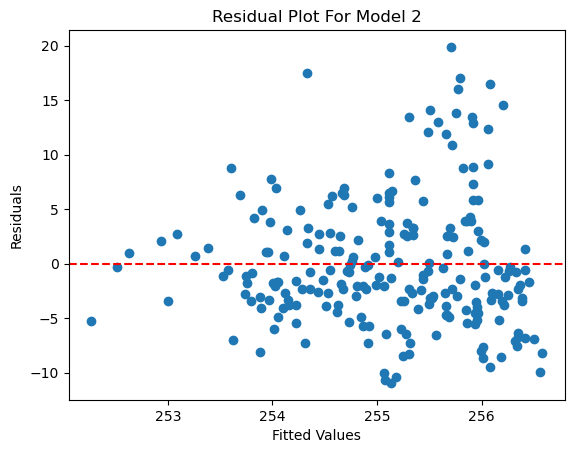

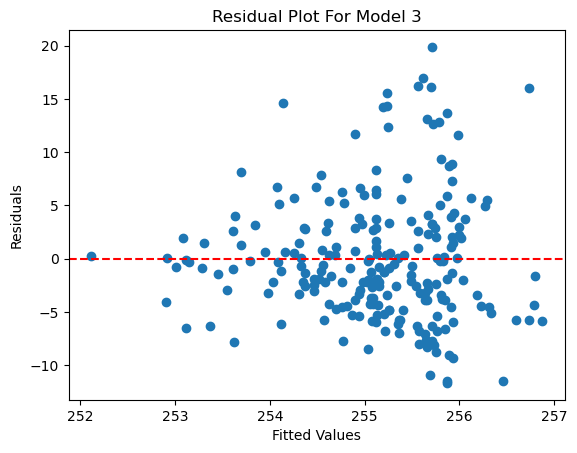

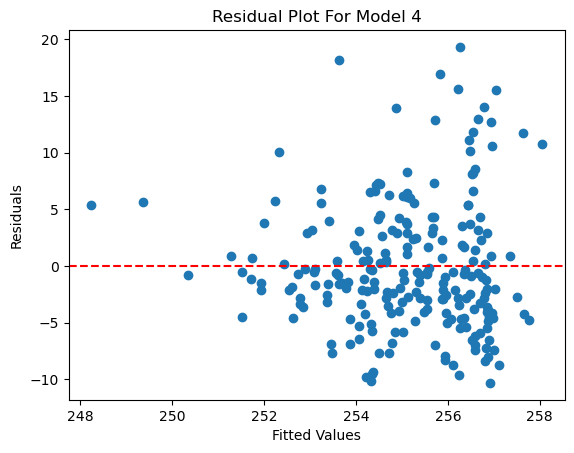

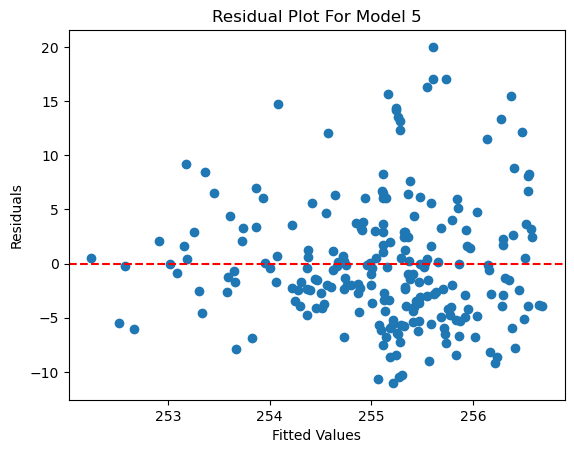

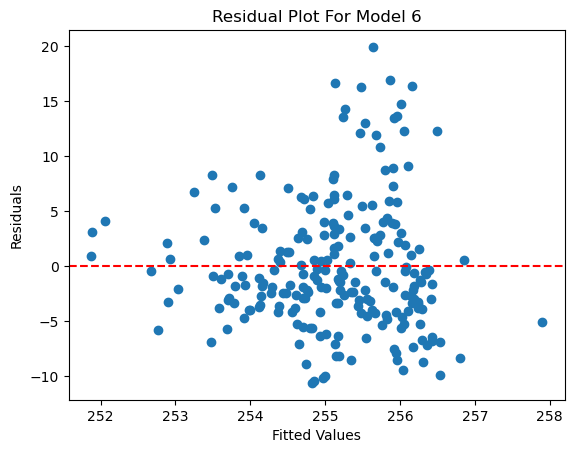

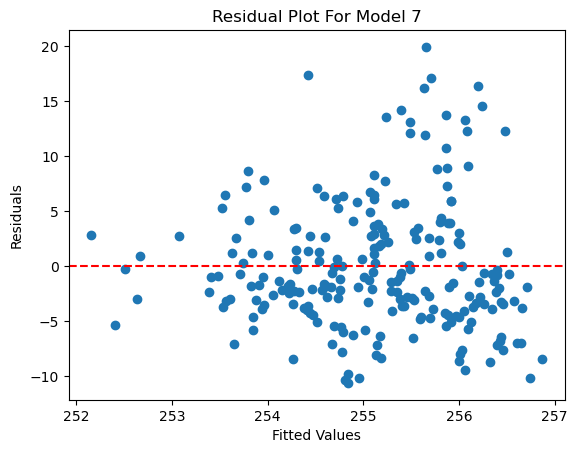

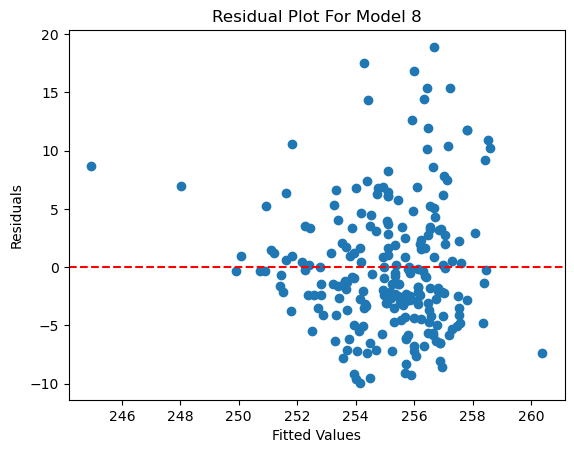

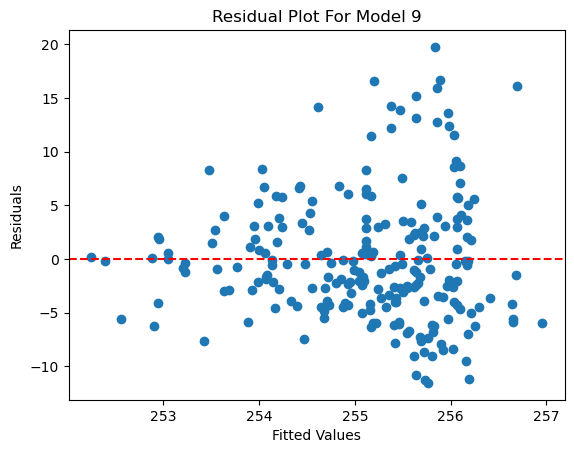

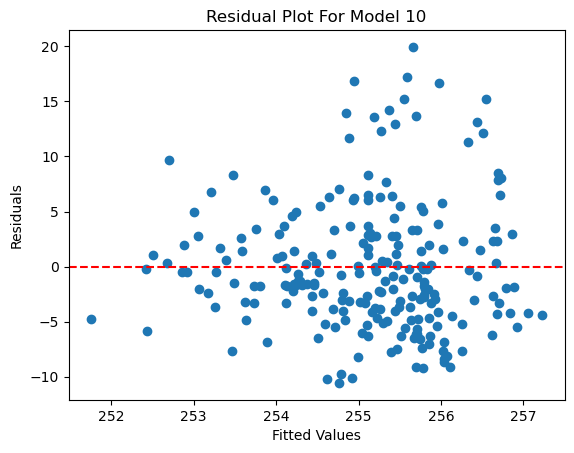

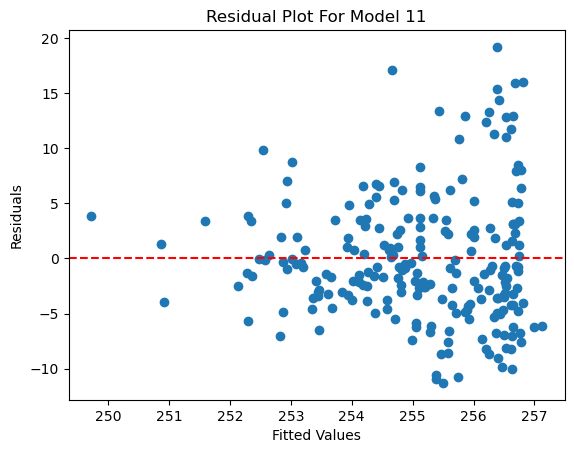

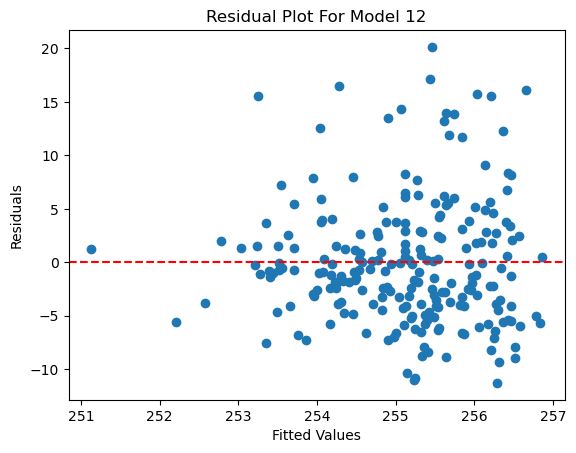

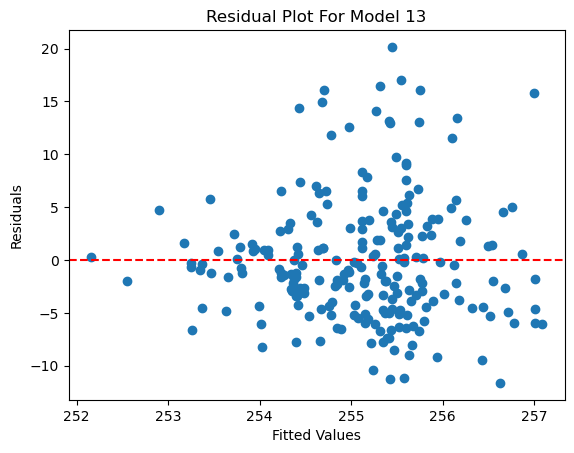

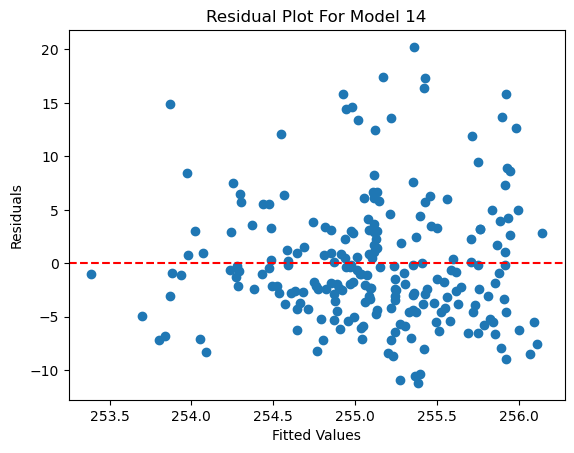

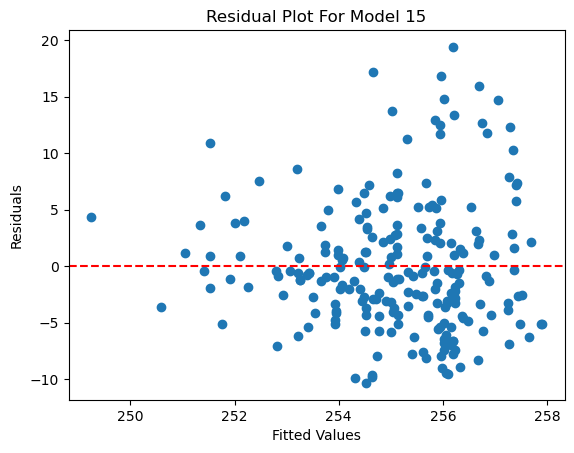

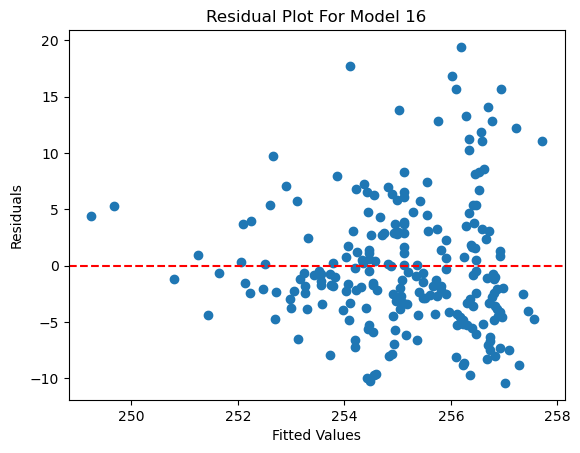

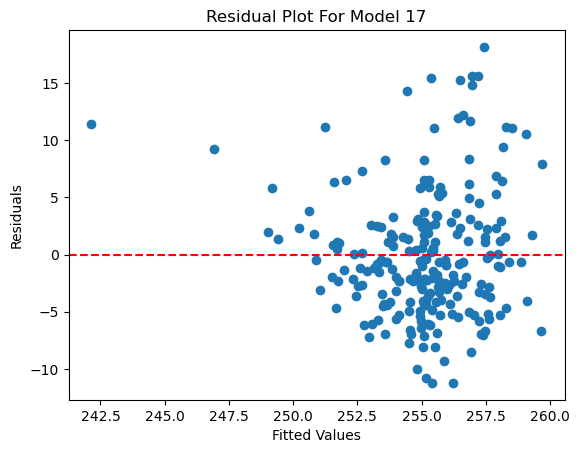

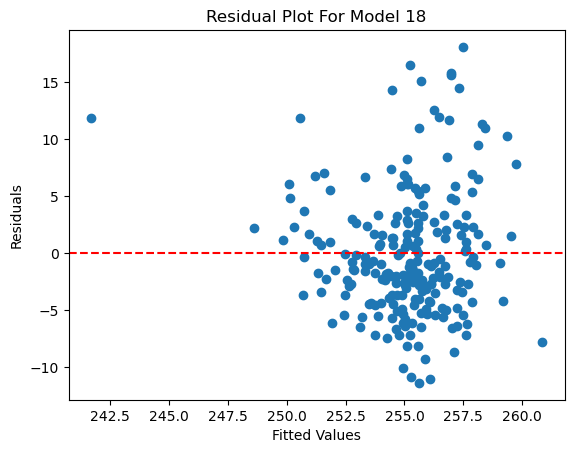

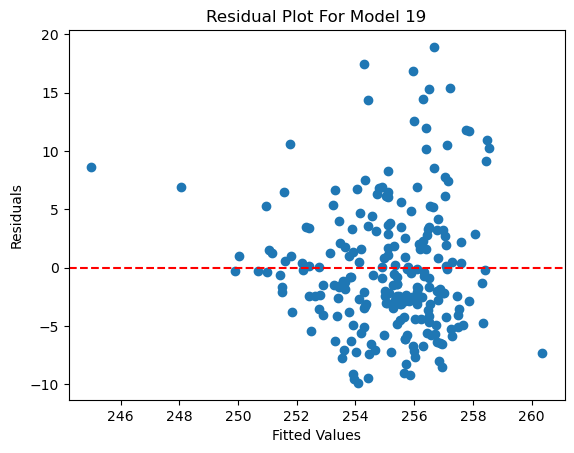

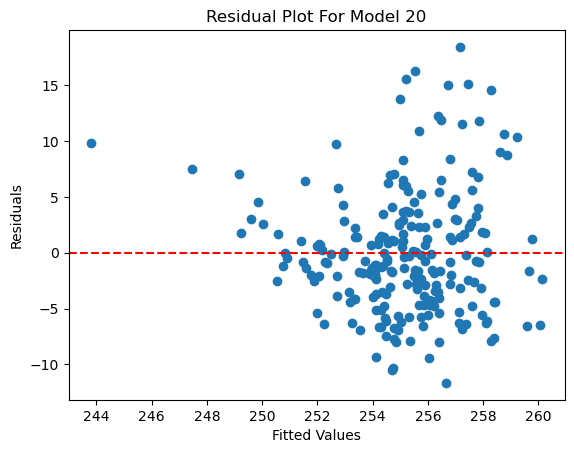

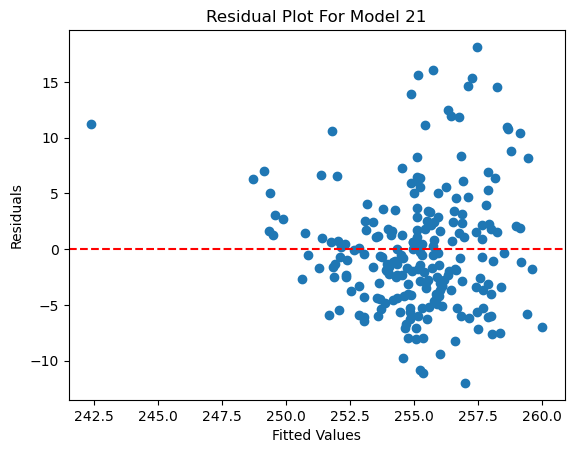

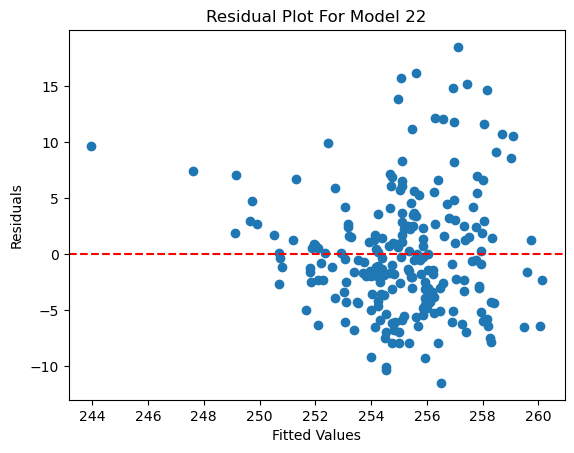

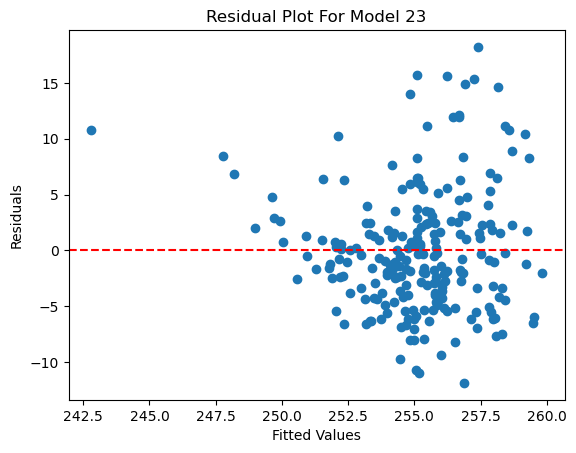

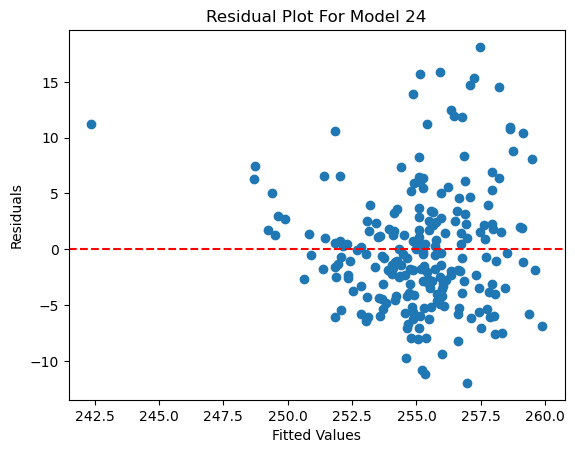

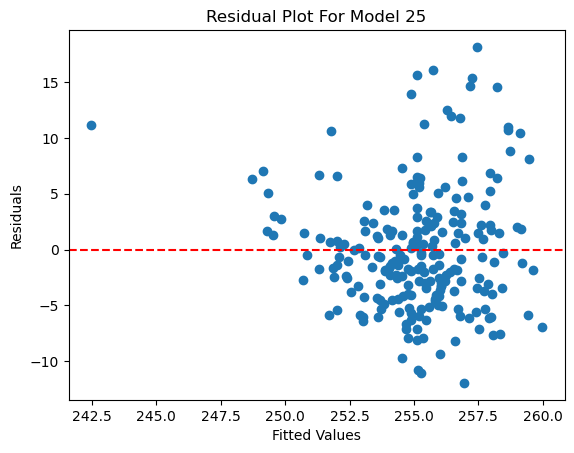

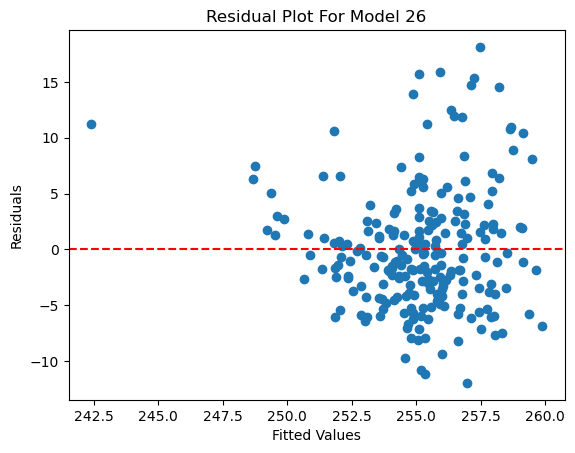

In [19]:
## Residual Plots For All Models
models = model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14, model15, model16, model17, model18, model19, model20, model21, model22, model23, model24, model25, model26
for i in models:
    residuals = i.resid
    plt.scatter(i.fittedvalues, residuals)
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    #plt.title("Residual Plot For Model", i)
    plt.title(f"Residual Plot For Model {models.index(i)+1}")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()